# 0.3 SVM支持向量机
### 0.3.1 线性可分SVM（硬间隔）
目标是找到一个超平面 $w^Tx+b=0$，使得两类样本到超平面的**间隔最大化**。
**决策超平面**
  $$w^Tx+b=0$$
  其中 $w$ 是超平面法向量，$b$ 是偏置项。
**样本间隔**
  对任意样本 $(x_i,y_i)$（$y_i\in\{+1,-1\}$ 为类别标签），满足分类约束：
  $$y_i(w^Tx_i+b)\ge1$$
  样本到超平面的**几何间隔**为 
  $$d=\frac{|w^Tx_i+b|}{\|w\|}$$
  支持向量是所有样本中的最小几何间隔的样本点，满足$w^Tx+b=±1$，到超平面距离为
  $$\frac{1}{\|w\|}$$
**优化目标（最大间隔）**
  最大化最小间隔 $\frac{2}{\|w\|}$，
  $$
  \begin{cases}
  \max_{w,b} \frac{2}{\|w\|}\\
  \text{s.t.}\quad y_i(w^Tx_i+b)\ge1,\quad i=1,2,\dots,n
  \end{cases}
  $$
  等价于：
  $$
  \begin{cases}
  \min_{w,b} \frac{1}{2}\|w\|^2 \\
  \text{s.t.}\quad y_i(w^Tx_i+b)\ge1,\quad i=1,2,\dots,n
  \end{cases}
  $$
**SVM硬间隔对偶问题求解过程**\
步骤1：构造拉格朗日函数
引入拉格朗日乘子 $\alpha_i \ge 0$，构造拉格朗日函数：
\begin{equation}
L(w, b, \alpha) = \frac{1}{2}\|w\|^2 + \sum_{i=1}^{m} \alpha_i \left(1 - y_i(w^T x_i + b)\right)
\end{equation}
步骤2：对 $w$ 和 $b$ 求偏导并令其为0
对 $w$ 求偏导并置零：
\begin{equation}
\frac{\partial L}{\partial w} = w - \sum_{i=1}^{m} \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^{m} \alpha_i y_i x_i
\end{equation}
对 $b$ 求偏导并置零：
\begin{equation}
\frac{\partial L}{\partial b} = -\sum_{i=1}^{m} \alpha_i y_i = 0 \implies \sum_{i=1}^{m} \alpha_i y_i = 0
\end{equation}
步骤3：回代得到对偶问题
将 $w = \sum_{i=1}^{m} \alpha_i y_i x_i$ 代入拉格朗日函数，得到对偶优化问题：
\begin{cases}
\max_{{\alpha}} \quad \sum_{i=1}^{m} \alpha_i - \frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m} \alpha_i \alpha_j y_i y_j x_i^T x_j \\
\text{s.t.} \quad \sum_{i=1}^{m} \alpha_i y_i = 0,\quad \alpha_i \ge 0,\quad i=1,2,\dots,m
\end{cases}
步骤4：求解最优参数
最优权重 $w^*$：
\begin{equation}
w^* = \sum_{i=1}^{m} \alpha_i^* y_i x_i
\end{equation}
（其中 $\alpha_i^*$ 是对偶问题的最优解）
最优偏置 $b^*$：
取一个支持向量（满足 $\alpha_i^* > 0$），代入 $y_i(w^{*T} x_i + b^*) = 1$，解得：
\begin{equation}
b^* = y_i - w^{*T} x_i
\end{equation}
决策函数
最终分类决策函数为：
\begin{equation}
f(x) = \text{sign}\left(w^{*T} x + b^*\right)
\end{equation}
### 0.3.2 线性不可分SVM（软间隔）
引入**松弛变量 $\xi_i\ge0$** 允许少量样本违反分类约束，同时加入惩罚项平衡间隔和误分类：
$$
  \begin{cases}
  \min_{w,b,\xi_i} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^n\xi_i \\
  \text{s.t.}\quad y_i(w^Tx_i+b)\ge1-\xi_i,\quad \xi_i\ge0,\quad i=1,2,\dots,n
  \end{cases}
  $$
其中 $C>0$ 是惩罚系数，$C$ 越大对误分类的惩罚越重。

**非线性SVM（核技巧）**
通过**核函数 $K(x_i,x_j)=\phi(x_i)^T\phi(x_j)$** 将低维非线性可分样本映射到高维特征空间，转化为线性可分问题。

原优化问题的**对偶形式**（核心）
  $$
  \begin{cases}
  \max_{\alpha} \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jK(x_i,x_j) \\
  \text{s.t.}\quad \sum_{i=1}^n\alpha_iy_i=0,\quad 0\le\alpha_i\le C,\quad i=1,2,\dots,n
  \end{cases}
  $$
  其中 $\alpha_i$ 是拉格朗日乘子，仅**支持向量**对应的 $\alpha_i>0$。
最终决策函数
  $$f(x)=\text{sign}\left(\sum_{i=1}^n\alpha_iy_iK(x_i,x)+b\right)$$
  常见核函数：
| 名称 | 表达式 | 参数 |
| :---: | :---: | :---: |
| 线性核 | $\kappa(\boldsymbol x_i,\boldsymbol x_j)=\boldsymbol x_i^T \boldsymbol x_j$ | 无 |
| 多项式核 | $\kappa(\boldsymbol x_i,\boldsymbol x_j)=(\boldsymbol x_i^T \boldsymbol x_j)^d$ | $d\ge1$ 为多项式的次数 |
| 高斯核 | $\kappa(\boldsymbol x_i,\boldsymbol x_j)=\exp\left(-\frac{\|\boldsymbol x_i-\boldsymbol x_j\|^2}{2\delta^2}\right)$ | $\delta>0$ 为高斯核的带宽 |
| 拉普拉斯核 | $\kappa(\boldsymbol x_i,\boldsymbol x_j)=\exp\left(-\frac{\|\boldsymbol x_i-\boldsymbol x_j\|}{\delta}\right)$ | $\delta>0$ |
| Sigmoid核 | $\kappa(\boldsymbol x_i,\boldsymbol x_j)=\tanh(\beta\boldsymbol x_i^T \boldsymbol x_j+\theta)$ | $\tanh$为双曲正切函数，$\beta>0,\theta<0$ |

## 0.3.3 鸢尾花数据集SVM分类

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [8]:
iris = datasets.load_iris()

x = iris.data[:,[2,3]]
y = iris.target

print("Class Labels: ", np.unique(y))

Class Labels:  [0 1 2]


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1, stratify=y)

print("原数据集各分类标签数：", np.bincount(y))
print("训练集各分类标签数：", np.bincount(y_train))
print("测试集各分类标签数：", np.bincount(y_test))

原数据集各分类标签数： [50 50 50]
训练集各分类标签数： [35 35 35]
测试集各分类标签数： [15 15 15]


In [10]:
# 绘制决策边界，函数，regions(X, y表示分类器, resolution=起始0.02):
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 设置标记生成器和颜色映射
    markers = ('o', 's', '^', 'v', '<')  # 标记生成器
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  # 定义颜色
    cmap = ListedColormap(colors[:len(np.unique(y))])  # 类别对应的颜色，一种类别一个颜色
    # 绘制决策边界 x1_min - x1_max
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 数据集X第一列的最小值-1，最大值+1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 数据集X第二列的最小值-1，最大值+1
    # 生成网格点矩阵
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # 生成所有网格点预测矩阵
    Z = Z.reshape(xx1.shape)  # 对不同分类进行标记
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)  # 生成边界图
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 绘制所有样本点
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],  # 散点的坐标x(分类标签==cl)
                    y=X[y == cl, 1],  # 散点的坐标y(分类标签==cl)
                    alpha=0.8,  # 散点的透明度
                    c=colors[idx],  # 散点的颜色
                    marker=markers[idx],  # 散点的图形
                    label=f'Class {cl}',  # 散点的样本名称
                    edgecolor='black')  # 散点的边框颜色

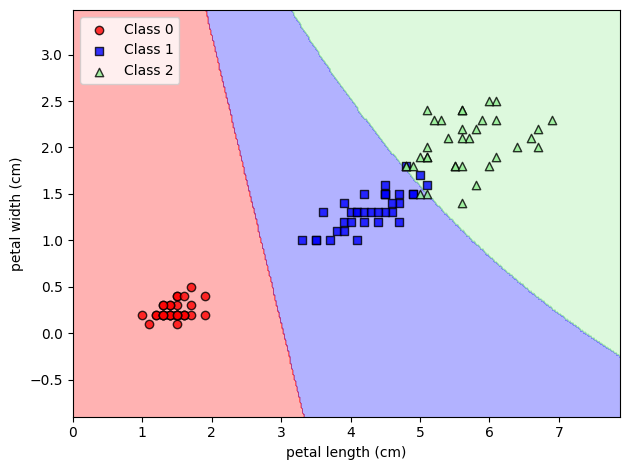

In [11]:
svm = SVC(kernel="poly", C=1, random_state=1) # kernel:核函数, C:松弛变量
svm.fit(x_train,y_train)
plot_decision_regions(x_train,y_train,classifier=svm)
plt.xlabel(f"{iris.feature_names[2]}") #'petal length (cm)'
plt.ylabel(f"{iris.feature_names[3]}") #'petal width (cm)'
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [12]:
y_pred = svm.predict(x_test)
print("测试集错误分类数:{}".format((y_pred != y_test).sum()))
print("测试集score:{:.4f}".format(svm.score(x_test,y_test)))

测试集错误分类数:1
测试集score:0.9778
